In [3]:
import pandas as pd
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import  Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation, Dropout

In [66]:
#loading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.shape

(42000, 785)

In [67]:
#separating labels from dataset
Y = train[["label"]]
df = train.drop(train.columns[0], axis = 1)


In [68]:
df = df.to_numpy()
Y = Y.to_numpy()
test = test.to_numpy()
#multiclass classification problem

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int64)

In [69]:
df.shape[0]

42000

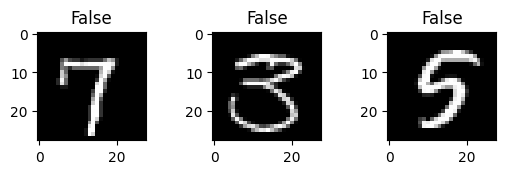

In [71]:
import matplotlib.pyplot as plt
#Convert train datset to (num_images, img_rows, img_cols) format 
df = df.reshape(df.shape[0], 28, 28)
test = test.reshape(test.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(df[i], cmap=plt.get_cmap('gray'))
    plt.title(df[i].all());

In [74]:
#reshaping features array, expand 1 more dimension as 1 for colour channel gray
df = df.reshape(len(df),28,28,1).astype('float32') 
test = test.reshape(len(test),28,28,1).astype('float32') 

df.shape

(42000, 28, 28, 1)

In [76]:
#feature Normalization
import numpy as np
mean_px = df.mean().astype(np.float32)
std_px = df.std().astype(np.float32)
df = (df-mean_px)/std_px

mean_px_test = test.mean().astype(np.float32)
std_px_test = test.std().astype(np.float32)
test = (test-mean_px)/std_px

In [80]:
#mapping our labels/classes to a matrix that has binary values(one_hot_encoding)
from keras.utils import to_categorical
Y = to_categorical(Y)
num_classes = Y.shape[1]
num_classes



10

In [ ]:
''' Conv - Conv - Batch - Pool - Dropout - Conv - Conv - Batch - Pool - Dropout - Flatten -
 FullyConnected - Batch - FullyConnected - Batch - Dropout - Softmax'''

In [ ]:
#building our model
def Model():
    model = Sequential([
    Conv2D(28, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(28,  (5, 5)),
    BatchNormalization(name = "BatchNorm1"),

    Activation(activation='relu'),
    MaxPool2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding="same", activation= 'relu'),
    Conv2D(64, (3, 3), padding="same", activation= 'relu'),

    BatchNormalization(name = "BatchNorm2"),

    Activation('relu'),
    MaxPool2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(units=265, use_bias=False),

    BatchNormalization(name = "BatchNorm3"),
    Activation('relu'),

    Dense(units= 128, use_bias=False),
    BatchNormalization(name = "BatchNorm4"),
    Activation('relu'), 

    Dense(units= 84, use_bias=False),
    BatchNormalization(name = "BatchNorm5"),
    Activation('relu'), 

    Dropout(0.25),

    Dense(units = num_classes, activation='softmax')

    ])
    return model
    
   

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df,Y,test_size=0.2, random_state=2)

In [ ]:
model = Model()
model.compile
model.fit(x_train,y_train,batch_size=200,verbose=2,validation_data=(x_test,y_test),epochs=20)

In [ ]:
y_pred = model.predict(test)
y_pred = np.argmax(y_pred,axis = 1)
y_pred = pd.Series(y_pred,name="Label")


In [ ]:
y_pred.index +=1

In [ ]:
submission = y_pred.to_csv('submission.csv')